In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Dropping the duplicate data if any from the columns
df=df.drop_duplicates(subset=df.columns[1:], keep='first')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
male = df.loc[df['gender'] == 'male'].count()[0]
print("No. of males = ",male)
female = df.loc[df['gender'] == 'female'].count()[0]
print("No.of Females = " , female)
male_dataframe = df.loc[df['gender'] == 'male']
print(male_dataframe)
female_dataframe = df.loc[df['gender'] == 'female']
print(female_dataframe)

No. of males =  482
No.of Females =  518
    gender race/ethnicity parental level of education         lunch  \
3     male        group A          associate's degree  free/reduced   
4     male        group C                some college      standard   
7     male        group B                some college  free/reduced   
8     male        group D                 high school  free/reduced   
10    male        group C          associate's degree      standard   
..     ...            ...                         ...           ...   
985   male        group A                 high school      standard   
987   male        group E            some high school      standard   
990   male        group E                 high school  free/reduced   
994   male        group A                 high school      standard   
996   male        group C                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
3                      none       

C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\936600415.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male = df.loc[df['gender'] == 'male'].count()[0]
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\936600415.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female = df.loc[df['gender'] == 'female'].count()[0]


In [9]:
df.describe(percentiles=[.01,.05,.1,.25,.5,.75,.9,.95,.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
math score,1000.0,66.089,15.163080,0.0,27.99,40.95,47.0,57.00,66.0,77.0,86.0,90.05,98.01,100.0
reading score,1000.0,69.169,14.600192,17.0,31.99,44.00,51.0,59.00,70.0,79.0,87.1,92.00,100.00,100.0
writing score,1000.0,68.054,15.195657,10.0,31.98,42.95,48.0,57.75,69.0,79.0,87.0,92.00,100.00,100.0


# Bar Graph

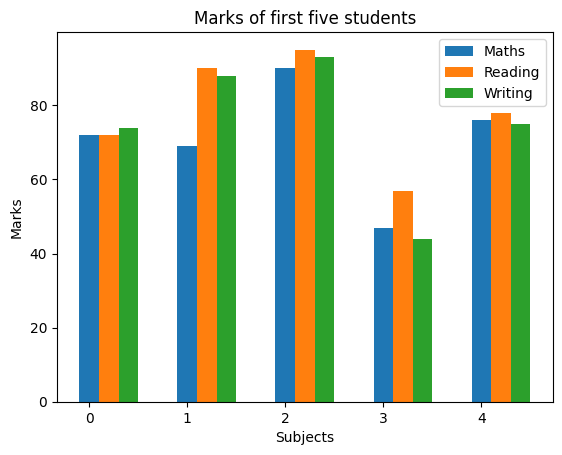

In [10]:
math = df['math score'].head()
reading = df['reading score'].head()
writing = df['writing score'].head()
plt.xlabel('Subjects')
plt.ylabel('Marks')
plt.title('Marks of first five students')
width =0.2
plt.bar(np.arange(len(math)), math, width=width, label = "Maths")
plt.legend(loc = 'upper right')
plt.bar(np.arange(len(reading))+ width, reading, width=width, label = "Reading")
plt.legend(loc = 'upper right')
plt.bar(np.arange(len(writing))+ 2*width, writing, width=width, label = "Writing")
plt.legend(loc = 'upper right')
plt.show()

This bar graph gives us the information about the marks of first five students

# Pie Chart

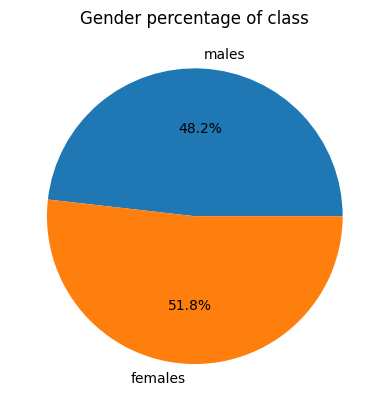

In [11]:
labels = ['males' , 'females']
plt.pie([male,female] , labels=labels , autopct='%.1f%%')
plt.title("Gender percentage of class")
plt.show()

This pie chart gives us the information about no. of males and females in a class

C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\1655416760.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([df.loc[df['lunch'] == 'standard'].count()[0] , df.loc[df['lunch'] == 'free/reduced'].count()[0]] , labels=labels , autopct='%.2f%%')
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\1655416760.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([df.loc[df['lunch'] == 'standard'].count()[0] , df.loc[df['lunch'] == 'free/reduced'].count()[0]] , labels=labels , autopct='%.2f%%')


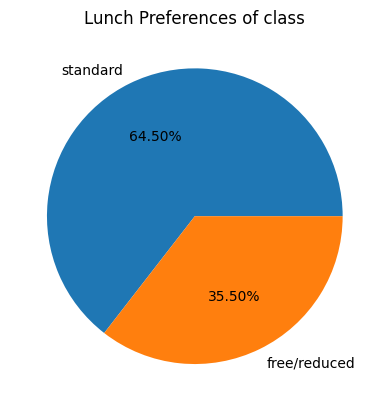

In [12]:
labels = ['standard' , 'free/reduced']
plt.pie([df.loc[df['lunch'] == 'standard'].count()[0] , df.loc[df['lunch'] == 'free/reduced'].count()[0]] , labels=labels , autopct='%.2f%%')
plt.title("Lunch Preferences of class")
plt.show()

This pie chart tells us the food preferences of students

In [13]:
Group_A = df.loc[df['race/ethnicity'] == 'group A'].count()[0]
Group_B = df.loc[df['race/ethnicity'] == 'group B'].count()[0]
Group_C = df.loc[df['race/ethnicity'] == 'group C'].count()[0]
Group_D = df.loc[df['race/ethnicity'] == 'group D'].count()[0]
Group_E = df.loc[df['race/ethnicity'] == 'group E'].count()[0]
print(Group_A,Group_B,Group_C,Group_D,Group_E)

89 190 319 262 140


C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\2745438021.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Group_A = df.loc[df['race/ethnicity'] == 'group A'].count()[0]
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\2745438021.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Group_B = df.loc[df['race/ethnicity'] == 'group B'].count()[0]
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\2745438021.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `

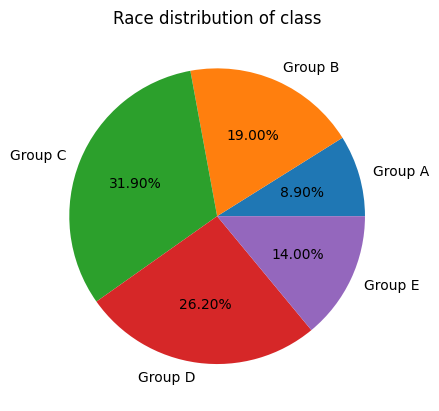

In [14]:
labels = ['Group A' , 'Group B' , 'Group C' , 'Group D' , 'Group E']
plt.pie([Group_A,Group_B,Group_C,Group_D,Group_E] , labels=labels , autopct='%.2f%%')
plt.title("Race distribution of class")
plt.show()

This pie chart gives us the information about the race/ethnicity ratio of the class

In [15]:
none = df.loc[df['test preparation course'] == 'none'].count()[0]
complete = df.loc[df['test preparation course'] == 'completed'].count()[0]
print(none,complete)

642 358


C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\4034141503.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  none = df.loc[df['test preparation course'] == 'none'].count()[0]
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\4034141503.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  complete = df.loc[df['test preparation course'] == 'completed'].count()[0]


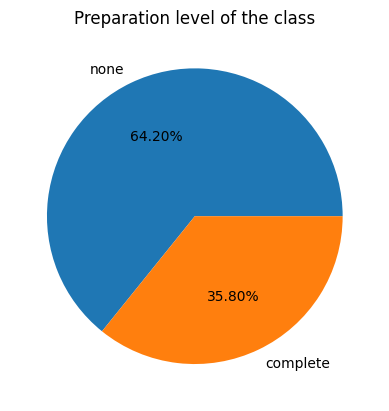

In [16]:
labels = ['none', 'complete']
plt.pie([none,complete] , labels=labels , autopct='%.2f%%')
plt.title("Preparation level of the class")
plt.show()

This pie chart gives us the information about the preparation level of the class

In [17]:
bachelors = df.loc[df['parental level of education'] == "bachelor's degree"].count()[0]
some_college = df.loc[df['parental level of education'] == 'some college'].count()[0]
masters_degree = df.loc[df['parental level of education'] == "master's degree"].count()[0]
associates_degree = df.loc[df['parental level of education'] == "associate's degree"].count()[0]
highschool = df.loc[df['parental level of education'] == 'high school'].count()[0]
print(bachelors,some_college,masters_degree,associates_degree,highschool)

118 226 59 222 196


C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\2707768115.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bachelors = df.loc[df['parental level of education'] == "bachelor's degree"].count()[0]
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\2707768115.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  some_college = df.loc[df['parental level of education'] == 'some college'].count()[0]
C:\Users\Hp\AppData\Local\Temp\ipykernel_1412\2707768115.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

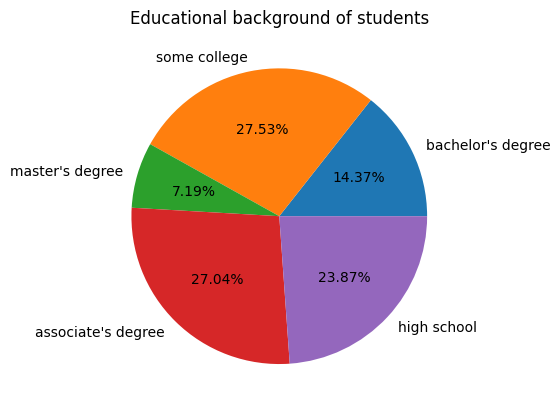

In [18]:
labels = ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school']
plt.pie([bachelors, some_college, masters_degree, associates_degree, highschool] , labels=labels , autopct='%.2f%%')
plt.title("Educational background of students")
plt.show()

This pie chart gives us the information about educational background of the student's of the class

# Line chart

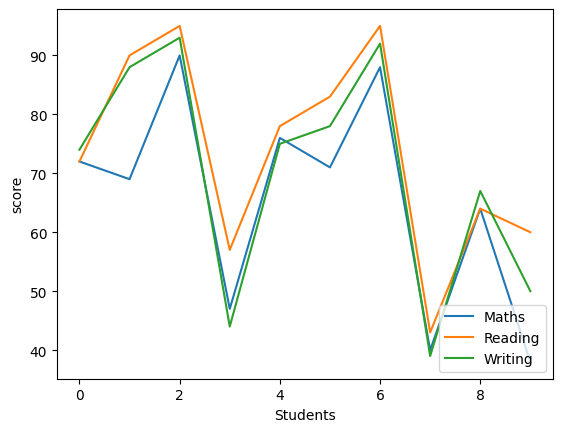

In [19]:
plt.plot('math score' , data=df[0:10],label = "Maths")
plt.legend(loc = 'lower right')
plt.xlabel('Students')
plt.ylabel('score')
plt.plot('reading score' , data=df[0:10],label = "Reading")
plt.legend(loc = 'lower right')
plt.plot('writing score' , data=df[0:10],label = "Writing")
plt.legend(loc = 'lower right')

This line chart gives us the marks of first 10 students

# Histogram

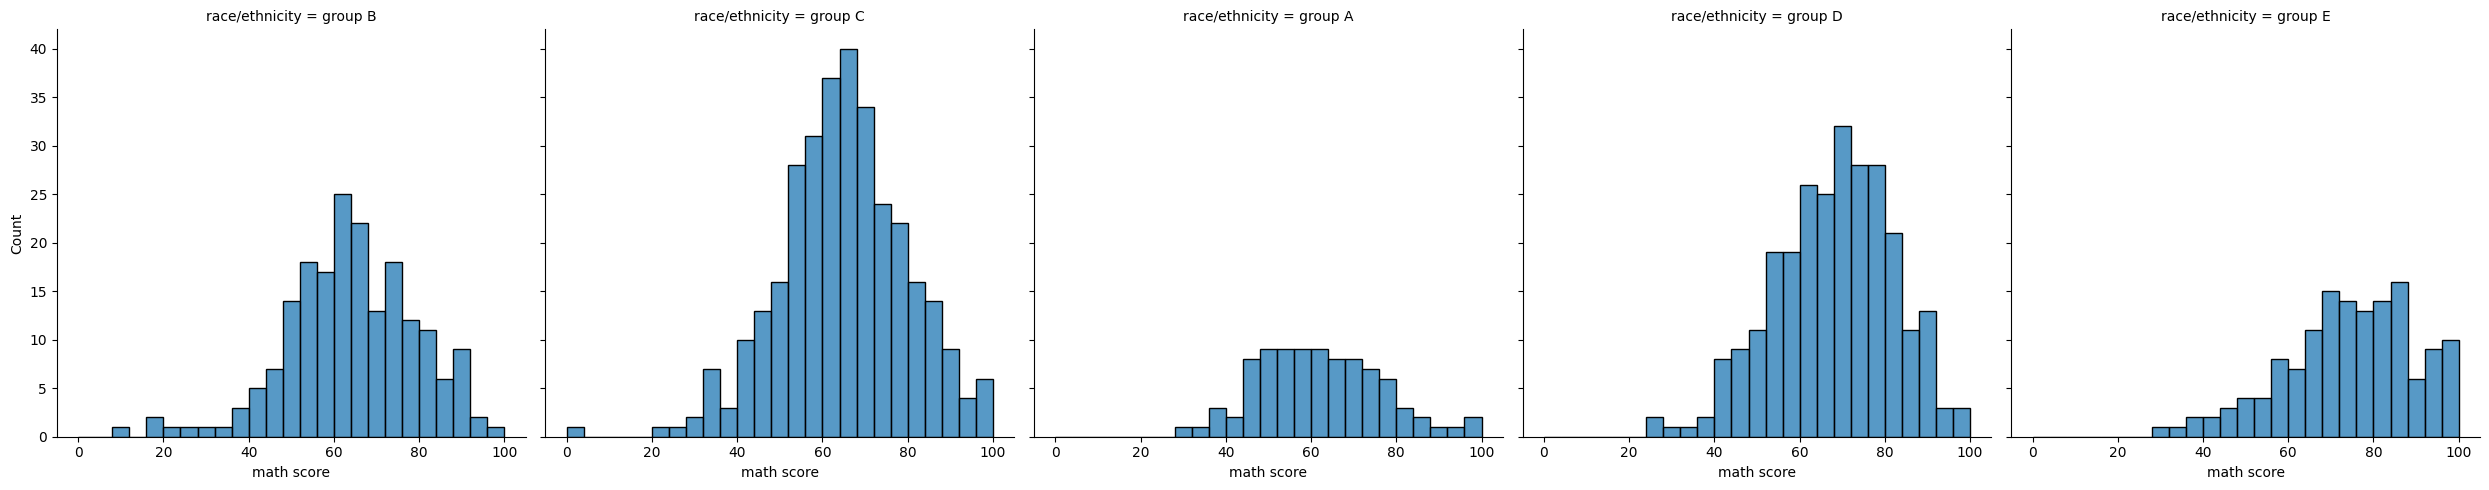

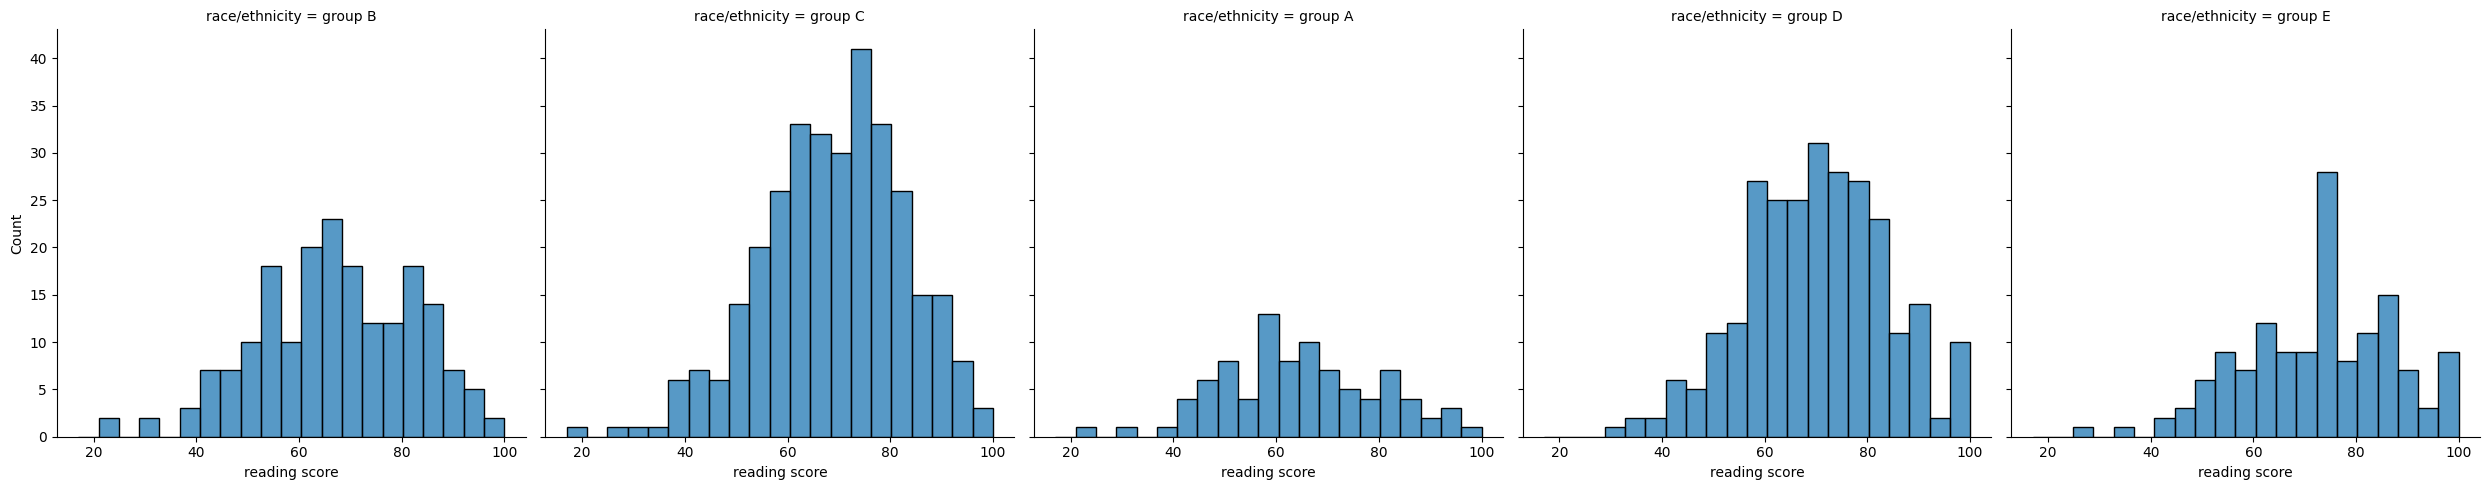

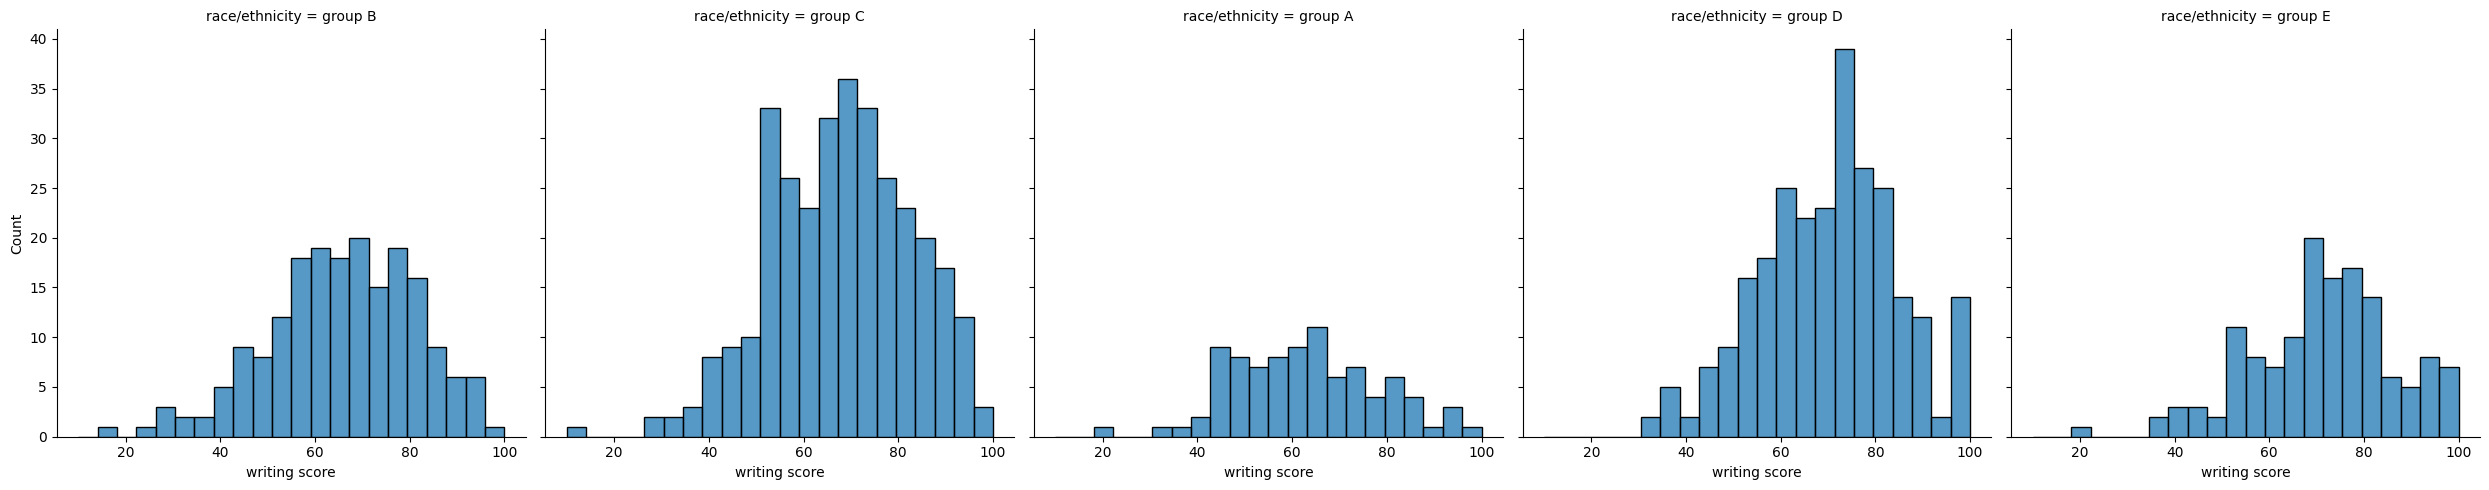

In [20]:
sns.displot(df, x="math score", col="race/ethnicity")
sns.displot(df, x="reading score", col="race/ethnicity")
sns.displot(df, x="writing score", col="race/ethnicity")

These Histograms gives us the marks of different subjects of students of different race/ethnicity

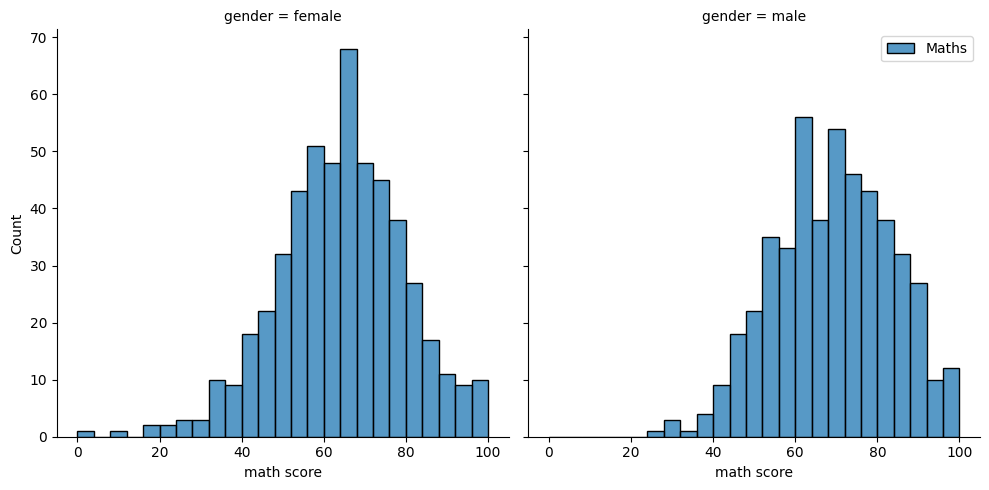

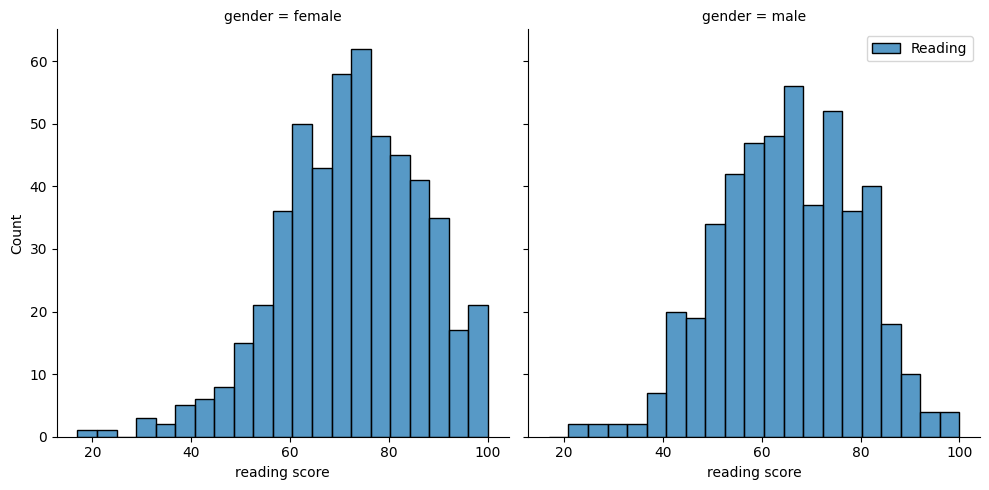

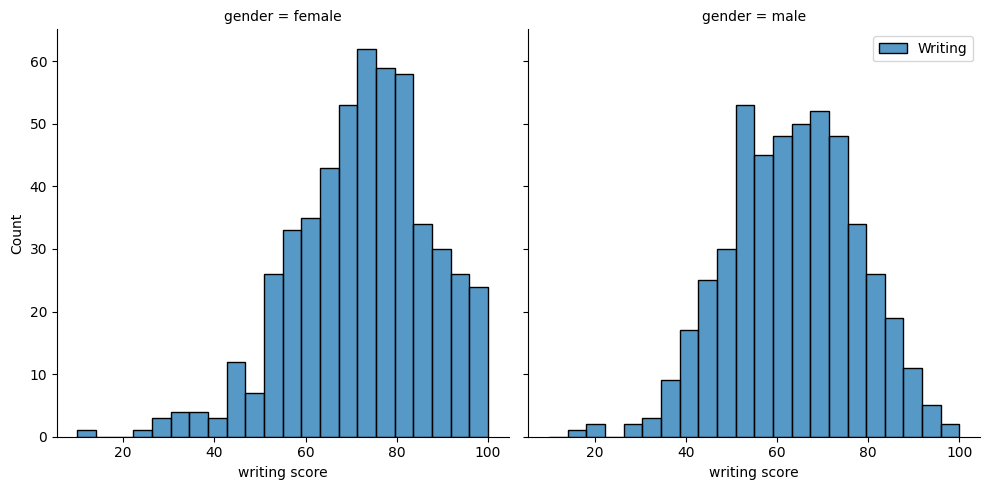

In [21]:
sns.displot(df, x="math score", col="gender",label = "Maths")
plt.legend(loc = "upper right")
sns.displot(df, x="reading score", col="gender",label = "Reading")
plt.legend(loc = "upper right")
sns.displot(df, x="writing score", col="gender",label = "Writing")
plt.legend(loc = "upper right")

These Histograms gives us the scores of all subjects of males and females

# Box Plot

<Axes: ylabel='parental level of education'>

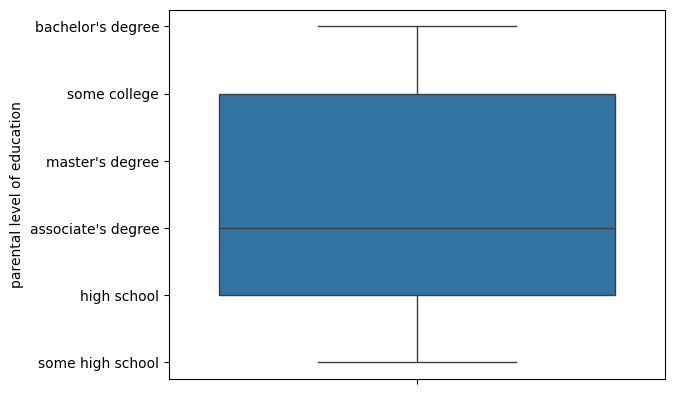

In [22]:
sns.boxplot(df,y ='parental level of education')

<Axes: ylabel='math score'>

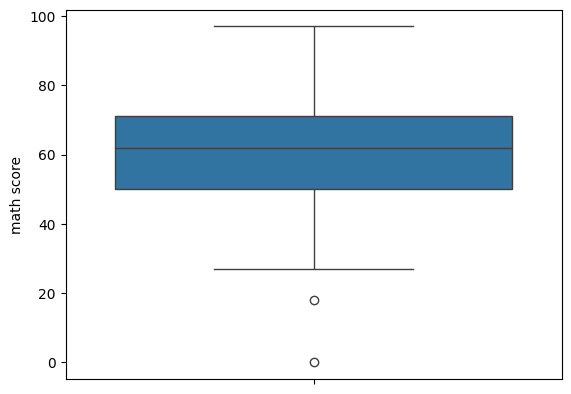

In [23]:
sns.boxplot(df.head(100),y ='math score')

<Axes: ylabel='reading score'>

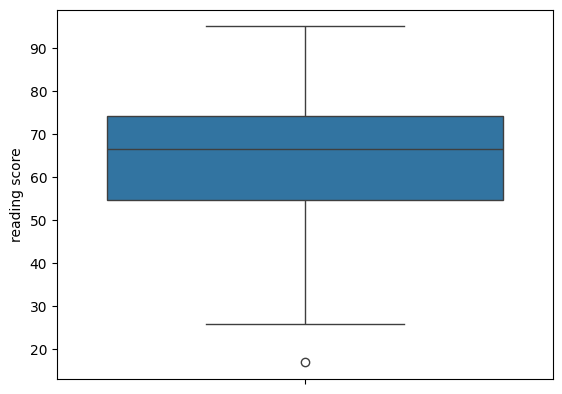

In [24]:
sns.boxplot(df.head(100),y = 'reading score')

<Axes: ylabel='writing score'>

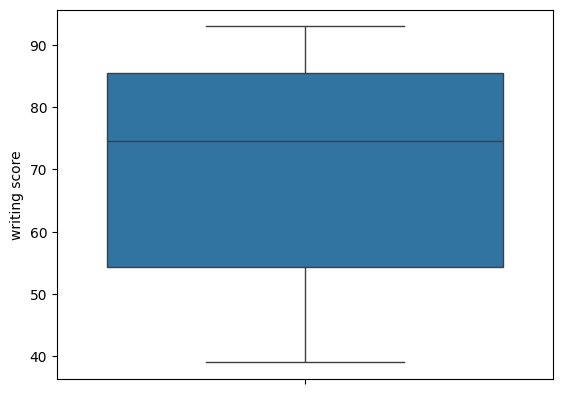

In [25]:
sns.boxplot(df.head(10),y ='writing score')

# Heat Map

Text(50.722222222222214, 0.5, 'Number of students')

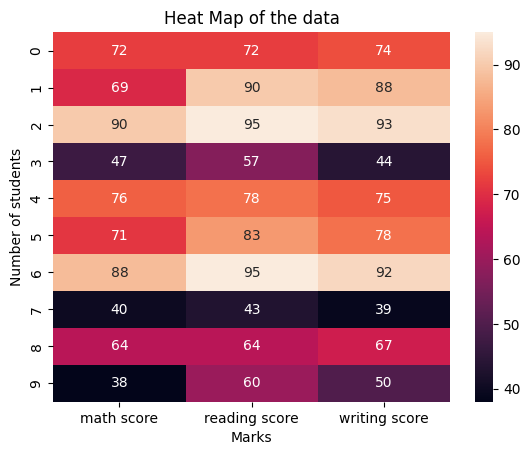

In [26]:
column = ['math score','reading score','writing score']
sns.heatmap(df[column].head(10),annot=True)
plt.title("Heat Map of the data")
plt.xlabel('Marks')
plt.ylabel('Number of students')

# Scatter Plot

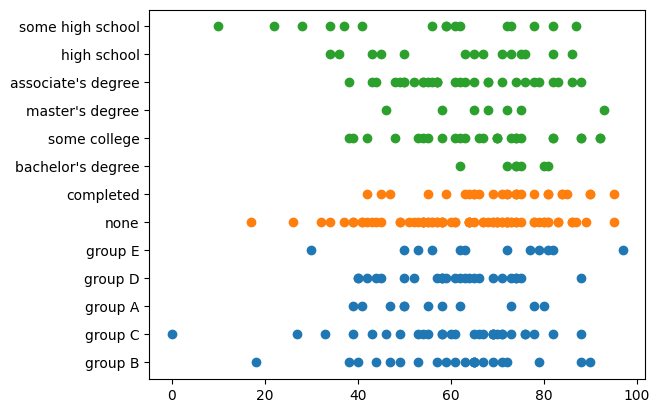

In [27]:
plt.scatter(df['math score'].head(100),df['race/ethnicity'].head(100))
plt.scatter(df['reading score'].head(100),df['test preparation course'].head(100))
plt.scatter(df['writing score'].head(100),df['parental level of education'].head(100))
plt.show()